In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('../Feature Engineering/Ames_final_DF.csv')
df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,0,0,0,0,1,0,0,0,1,0
2921,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,0,0,0,0,1,0,0,0,1,0
2922,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,1,0,0,0,1,0
2923,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,0,0,0,0,1,0,0,0,1,0


In [5]:
X=df.drop('SalePrice' , axis=1)
y=df['SalePrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)


from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [7]:
from sklearn.linear_model import ElasticNet
model=ElasticNet(max_iter=1000000)

In [9]:
param_grid={'alpha' : [ 109,110 ,111 , 112 , 115 ,120 ],
            'l1_ratio' : [ .9 , .99 , 1]}

from sklearn.model_selection import GridSearchCV
grid_model=GridSearchCV(estimator=model , param_grid=param_grid , verbose=2 , scoring='neg_root_mean_squared_error', cv=10)

In [11]:
grid_model.fit(X_train , y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV] END ............................alpha=109, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=109, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=109, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=109, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=109, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=109, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=109, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=109, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=109, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=109, l1_ratio=0.9; total time=   0.0s
[CV] END ...........................alpha=109, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=109,

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=1000000),
             param_grid={'alpha': [109, 110, 111, 112, 115, 120],
                         'l1_ratio': [0.9, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [13]:
grid_model.best_estimator_

ElasticNet(alpha=110, l1_ratio=1, max_iter=1000000)

In [15]:
y_pred=grid_model.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
MAE=mean_absolute_error(y_test , y_pred)
RMSE=np.sqrt(mean_squared_error(y_test , y_pred))
MAE , RMSE

(14189.39832247234, 20555.07298862769)

In [19]:
np.mean(df['SalePrice'])

180815.53743589742

In [21]:
test_res=y_test - y_pred

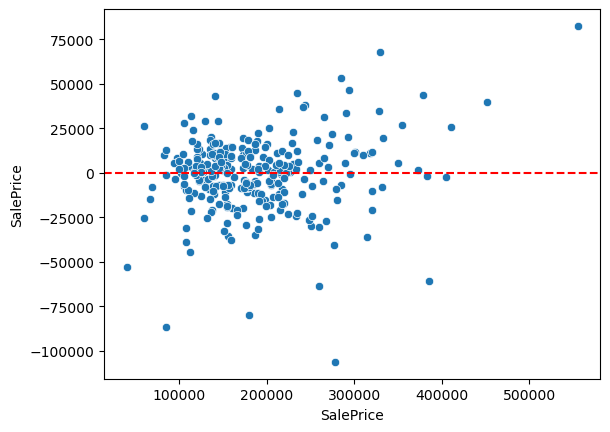

In [23]:
sns.scatterplot(x=y_test , y=test_res)
plt.axhline(y=0 , color='r' , ls='--')

<Axes: xlabel='SalePrice', ylabel='Density'>

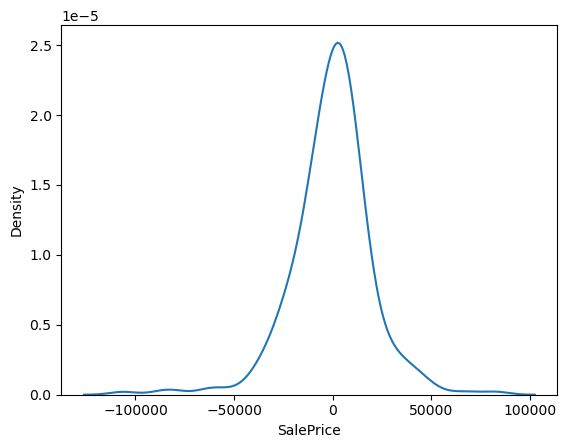

In [25]:
sns.kdeplot(test_res)

# Deploy_Model

In [27]:
from joblib import dump , load

In [29]:
dump(grid_model , 'grid_model_Real_estate.joblib')

['grid_model_Real_estate.joblib']

In [31]:
load('grid_model_Real_estate.joblib')

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=1000000),
             param_grid={'alpha': [109, 110, 111, 112, 115, 120],
                         'l1_ratio': [0.9, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [69]:
df1=df.iloc[1:12]

In [71]:
df1=pd.DataFrame(data=df1 , columns=df.columns )
df1

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
5,78.000000,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,...,0,0,0,0,1,0,0,0,1,0
6,41.000000,4920,8,5,2001,2001,0.0,616.0,0.0,722.0,...,0,0,0,0,1,0,0,0,1,0
7,43.000000,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,...,0,0,0,0,1,0,0,0,1,0
8,39.000000,5389,8,5,1995,1996,0.0,1180.0,0.0,415.0,...,0,0,0,0,1,0,0,0,1,0
9,60.000000,7500,7,5,1999,1999,0.0,0.0,0.0,994.0,...,0,0,0,0,1,0,0,0,1,0
10,75.000000,10000,6,5,1993,1994,0.0,0.0,0.0,763.0,...,0,0,0,0,1,0,0,0,1,0


In [75]:
X=df1.drop('SalePrice' , axis=1)

X=scale.transform(X)
y_pred=grid_model.predict(X)

In [79]:
MAE=mean_absolute_error(df1['SalePrice'] , y_pred)
RMSE=np.sqrt(mean_squared_error(df1['SalePrice'] , y_pred))
MAE , RMSE

(11166.583948385776, 15583.207050061732)